## Getting Started
<br> To get started, we will need to:
<ol>
<li>Download the <b>brent crude price</b> data from: <a href="https://www.investing.com/commodities/brent-oil">https://www.investing.com/commodities/brent-oil</a></li>
<li>Download the <b>gold future price</b> data from: <a href="https://www.investing.com/commodities/gold">https://www.investing.com/commodities/gold</a></li>
<li>Download the <b>bitcoin(USD) price</b> data from: <a href="https://www.investing.com/crypto/bitcoin">https://www.investing.com/crypto/bitcoin</a></li>
<li>Download the <b>Nigerian Stock Exchange All Share Index</b> data from: <a href="https://www.investing.com/indices/nse-all-share-historical-data">https://www.investing.com/indices/nse-all-share-historical-data</a></li>
</ol>
<br> The data is for the time period 01/01/18 - 09/07/18


### Import the libraries we will be using

<ol>
<li><b>Pandas</b> For data wrangling and Manipulation</li>
<li><b>Plotly,Matplotlib and Seaborn</b> For Visualization</li>
<li><b>MinMaxScaler</b> To Scale our data</li>

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from plotly.offline import iplot
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

<br> The data have been downloaded
<br> They were placed in the current working directory
<br> We can check the content of the current working directory by using the Ipython magic function

In [2]:
%ls

'Brent Oil Futures Historical Data.csv'  'NSE All Share Historical Data.csv'
'BTC_USD Bitfinex Historical Data.csv'   'Take Home Assignment.ipynb'
'Gold Futures Historical Data.csv'


#### Ingest Data
Now, we will need to read the dataset using the commands below

The data are read into a pandas data frame.

In [3]:
nse_df = pd.read_csv('NSE All Share Historical Data.csv')
btc_df = pd.read_csv('BTC_USD Bitfinex Historical Data.csv')
gold_df = pd.read_csv('Gold Futures Historical Data.csv')
brent_df = pd.read_csv('Brent Oil Futures Historical Data.csv')

<h1 style="font-size:2em;color:#2467C0">Exploring Data</h1>
<br> Let's check the first five rows of our data

In [4]:
nse_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/2/2018,38264.79,38243.19,38268.82,"37,646.88",248.48M,0.06%
1,1/3/2018,38187.28,38264.79,38579.51,"38,187.28",580.71M,-0.20%
2,1/4/2018,38676.12,38187.28,38848.31,"38,182.94",825.13M,1.28%
3,1/5/2018,38923.26,38676.12,39113.68,"38,676.12",753.29M,0.64%
4,1/8/2018,39849.65,38923.26,39851.45,"38,908.12",604.53M,2.38%


In [5]:
gold_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/1/2018,1308.7,1305.8,1309.7,1304.6,-,0.18%
1,1/2/2018,1313.7,1302.3,1317.6,1302.3,0.07K,0.38%
2,1/3/2018,1316.2,1320.0,1320.1,1312.1,0.04K,0.19%
3,1/4/2018,1319.4,1322.0,1322.0,1321.9,0.00K,0.24%
4,1/5/2018,1320.3,1320.3,1320.3,1320.3,0.00K,0.07%


In [6]:
brent_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/2/2018,66.57,66.55,67.29,66.24,211.74K,-0.45%
1,1/3/2018,67.84,66.54,68.03,66.40,260.86K,1.91%
2,1/4/2018,68.07,67.89,68.27,67.62,246.15K,0.34%
3,1/5/2018,67.62,67.97,68.11,67.26,183.45K,-0.66%
4,1/8/2018,67.78,67.80,67.99,67.44,210.35K,0.24%


In [7]:
btc_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/1/2018,13354.0,13794.0,13893.0,12787.0,29.54K,-0.0323
1,1/2/2018,14709.0,13448.0,15300.0,12810.0,56.18K,1/0/1900
2,1/3/2018,15155.0,14713.0,15428.0,14522.0,38.35K,1/0/1900
3,1/4/2018,15160.0,15150.0,15390.0,14064.0,46.47K,1/0/1900
4,1/5/2018,16917.0,15159.0,17101.0,14769.0,54.63K,1/0/1900


###### We don't need all the columns in our data frames
<ul>
<li> We will create a new data frame using a python dictionary</li>
<li> We take each of the data frame to create a new data frame with the data and price column</li>
<li><b>Price</b> and <b>Date</b> are the two columns needed to do a time series analysis of our data</li>
<li> The price will be renamed to reflect the commodity we are referring to e.g. bitcoin price will be btc_price</li>
<ul>

In [8]:
nse_ASI = pd.DataFrame({'Date':nse_df['Date'], 'ASI':nse_df['Price']})
btc = pd.DataFrame({'Date':btc_df['Date'], 'btc_price':btc_df['Price']})
gold = pd.DataFrame({'Date':gold_df['Date'], 'gold_price':gold_df['Price']})
brent = pd.DataFrame({'Date':brent_df['Date'], 'brent_price':brent_df['Price']})

<br>We combine the new data frames into one</br>
<br>This is done with the merge function in pandas</br>
<br>We merge on date,a left merge so the date column will be the first column</br>

In [9]:
df = pd.merge(btc, nse_ASI, on = 'Date', how='left')
df = pd.merge(df, brent, on = 'Date', how = 'left')
df = pd.merge(df, gold, on = 'Date', how = 'left')

<h1 style="font-size:2em;color:#2467C0">Exploring Data</h1>
<br> Let's check the first five rows of our data
<br> A summary statisics of the data

In [10]:
df.head()

,Date,btc_price,ASI,brent_price,gold_price
0,1/1/2018,13354.0,NaN,NaN,1308.7
1,1/2/2018,14709.0,38264.79,66.57,1313.7
2,1/3/2018,15155.0,38187.28,67.84,1316.2
3,1/4/2018,15160.0,38676.12,68.07,1319.4
4,1/5/2018,16917.0,38923.26,67.62,1320.3


In [11]:
df.describe()

,btc_price,ASI,brent_price,gold_price
count,191.000000,129.000000,135.000000,141.000000
mean,8966.439791,41105.819457,71.502889,1313.375887
std,2290.241305,2082.544118,4.856040,27.839691
min,5850.000000,36816.290000,62.590000,1239.800000
25%,7357.000000,39695.160000,67.620000,1298.300000
50%,8515.000000,41022.310000,70.520000,1318.600000
75%,9949.000000,42839.520000,75.715000,1333.000000
max,17161.000000,45092.830000,79.800000,1362.400000


<ul>
<li> The mean price of bitcoin is <b>8966.43</b></li>
<li> The highest price of bitcoin <b>17161</b> and lowest <b>5850.00</b></li>
<li> The mean price of brent crude is <b>71.50</b></li>
<li> The highest price of brent crude <b>79.8</b> and lowest <b>62.59</b></li>
<li> The mean price of gold is <b>1313.37</b></li>
<li> The highest price of gold <b>1362.40</b> and lowest <b>1239.80</b></li>
<li> The mean of the NSE ASI is <b>8966.43</b></li>
<li> The highest value of NSE ASI <b>45092.83</b> and lowest <b>36816.29</b></li>
<ul>

<h2 style="font-size:2em;color:#2467C0">Dealing with Missing Data</h2>

<br> First, we check if there are any missing values in our data. That's what the next cell does.

<br> There are missing values in our data. There are <b>62</b> days with missing data

<br> The missing values are weekend data (Saturday and Sunday) on the NSE ASI.

<br> There are different ways to deal with this. We could forward/backward fill.

<br> Since the data are absent, it is best we drop days with missing values.

In [12]:
len(df[pd.isnull(df).any(axis=1)])

62

In [13]:
#drop days with missing values

df = df.dropna()

In [14]:
# convert the date to a python date time format

df['Date'] = pd.to_datetime(df['Date'])

#### Next set of cells plot the time series data using plotly

In [15]:
iplot({
    'data':[go.Scatter(x = df['Date'], y = df['ASI'], name='ASI')],
    'layout':go.Layout({'title':'Time Series of Nigerian Stock Exchange ASI in 2018', 
                        'xaxis':{'title':'Date'}, 
                        'yaxis':{'title':'ASI'}}, showlegend=True)
},image_width=40, image_height=40)

In [16]:
iplot({
    'data':[go.Scatter(x = df['Date'], y = df['gold_price'], name='Gold')],
    'layout':go.Layout({'title':'Time Series of Gold Price in 2018', 
                        'xaxis':{'title':'Date'}, 
                        'yaxis':{'title':'Gold Price'}}, showlegend=True)
},image_width=50, image_height=50)

In [17]:
iplot({
    'data':[go.Scatter(x = df['Date'], y = df['brent_price'], name='ASI')],
    'layout':go.Layout({'title':'Time Series of Crude Oil Price(Brent) in 2018', 
                        'xaxis':{'title':'Date'}, 
                        'yaxis':{'title':'Brent Price'}}, showlegend=True)
},image_width=50, image_height=50)

In [18]:
iplot({
    'data':[go.Scatter(x = df['Date'], y = df['btc_price'], name='Bitcoin')],
    'layout':go.Layout({'title':'Time Series of Bitcoin Price in 2018', 
                        'xaxis':{'title':'Date'}, 
                        'yaxis':{'title':'Bitcoin Price'}}, showlegend=True)
},image_width=50, image_height=50)

<h4 style="font-size:2em;color:#2467C0">To see the correlation between the prices, we plot them on a single graph</h4>

<br>Because of the large difference in the values of our data, we need to scale our data using  MinMax scaler.

<br>MinMaxScaler transforms features by scaling each feature to a given range, between zero and one.

<br>The code <b>df.iloc[:,1:]</b> is to select all the rows and all columns except the first column which is the date column.

In [19]:
scale = MinMaxScaler()
df.iloc[:,1:] = scale.fit_transform(df.iloc[:,1:])

In [20]:
# first line plot
nse = go.Scatter(x = df['Date'],
                y= df['ASI'],
                mode = 'lines+markers',
                name = 'All Share Index')

# second line plot
bitcoin = go.Scatter(x = df['Date'],
                y= df['btc_price'],
                mode = 'lines+markers',
                name = 'Bitcoin Price')

# third line plot
gold = go.Scatter(x = df['Date'],
                y= df['gold_price'],
                mode = 'lines+markers',
                name = 'Gold Price')

# last line plot
brent = go.Scatter(x=df['Date'],
                  y= df['brent_price'],
                  mode = 'lines+markers',
                  name = 'Brent Price')

layout = go.Layout({
    'title': 'Time Series of the prices of gold, btc, brent and NSE ASI',
    'xaxis':{'title':'Date'},
    'yaxis':{'title': 'Prices'}}, showlegend=True)

In [21]:
data = [nse, bitcoin, gold, brent]
fig = dict(data=data, layout=layout)
iplot(fig)

### Heatmap or correlation matrix of our data points. Ranges from 1 to -1.
### 1 means highest positive correlation and -1 means highest negative correlation.

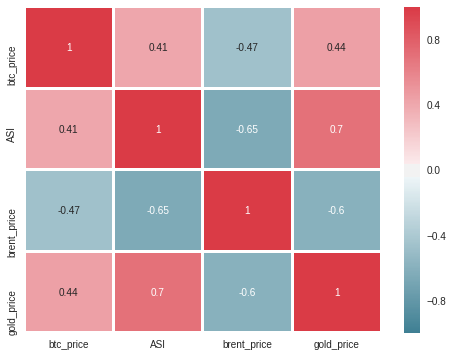

In [22]:
corr = df.corr()
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(corr, annot=True, cmap=cmap,linewidths=2.0)

## NOTES

<ol>
<li>Gold price and Nigerian Stock Exchange All share index have the highest correlation</li>
<li>The least correlated variables are Nigerian Stock Exchange and Bitcoin price</li>
<li>Brent crude price have a negative correlation with all the other variables and a fairly strong negative correlation with the NSE ASI and gold price</li>
</ol>